# Fish species Prediction

### liblaries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
import pickle

### dataset loading

In [2]:
fish_data = pd.read_csv('Fish.csv')
fish_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### display arthmetic infor about dataset

In [3]:
fish_data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


### checking for null values

In [4]:
fish_data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

### species

In [5]:
fish_data['Species'].value_counts()  

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

### species visualization

In [6]:
plt.rcParams['figure.figsize'] = [8,9]

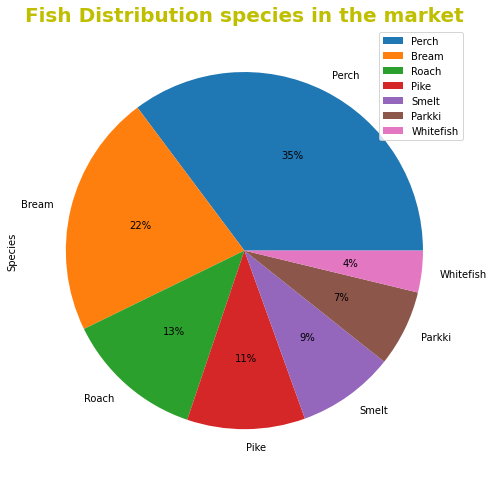

In [7]:
fish_data.Species.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Fish Distribution species in the market',fontweight='bold', fontsize=20, color='y')
plt.legend()

### converting categorical data

In [8]:
le = LabelEncoder()

In [9]:
fish_data['Species'] = le.fit_transform(fish_data['Species'])

In [10]:
fish_data['Species'].unique()

array([0, 4, 6, 1, 2, 3, 5])

In [29]:
le.inverse_transform([0, 4, 6, 1, 2, 3, 5])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

### diving data into features and labels

In [11]:
X = fish_data.drop(['Species'], axis=1)
y = fish_data['Species']

### train and test sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# The Model

### Random Forest

In [13]:
rf = RandomForestClassifier(random_state=42, n_estimators=500)

In [14]:
classifier = rf.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

### KNeighbours

In [15]:
kn = KNeighborsClassifier(n_neighbors = 5)

In [16]:
classifier2 = kn.fit(X_train, y_train)
y_pred2 = classifier2.predict(X_test)

### model evaluation

In [17]:
print('Random Forest ', accuracy_score(y_pred,y_test)*100)
print('KNeighbors ', accuracy_score(y_pred2,y_test)*100)

Random Forest  75.0
KNeighbors  47.91666666666667


### saving a model

In [18]:
file_name = "FishRandomForestModel.sav"
file_name2 = "FishKNeighborModel.sav"

In [19]:
pickle.dump(classifier, open(file_name,'wb'))
pickle.dump(classifier2, open(file_name2,'wb'))

## Making a predictive system

### loading a saved model

In [20]:
randomForest = pickle.load(open("FishRandomForestModel.sav",'rb'))

In [31]:
def fishSpecies():
    #========inputs===========
    Weight = eval(input('Fish Weight\t'))
    Length1 = eval(input('Fish Length1\t'))
    Length2 = eval(input('Fish Length2\t'))
    Length3 = eval(input('Fish Length3\t'))
    Height = eval(input('Fish Height\t'))
    Width = eval(input('Fish Width\t'))
    
    input_data = ([Weight,Length1,Length2,Length3,Height,Width])
    #=========convert data into numpy array===========
    input_data = np.asarray(input_data)
    #===========input data reshape===============
    input_data = input_data.reshape(1, -1)
    
    # 0-Perch, 4-Bream, 6-Roach, 1-Pike, 2-Smelt, 3-Parkki, 5-Whitefish
    # 2- Perch 3-Pike 5-Smelt 1-Parkki 4-Roach 6-Whitefish
    
    pred = randomForest.predict(input_data)
    
    if pred == 0:
        return 'Bream'
    elif pred == 1:
        return 'Parkki'
    elif pred ==2:
        return 'Perch'
    elif pred == 3:
        return 'Pike'
    elif pred == 4:
        return 'Roach'
    elif pred == 5:
        return 'Smelt'
    else:
        return 'Whitefish'
    
print('Fish species is ',fishSpecies())

Fish Weight	242
Fish Length1	23.2
Fish Length2	25.4
Fish Length3	30
Fish Height	11.52
Fish Width	4.02
Fish species is  Bream
